In [2]:
import pandas as pd
import sqlite3

In [3]:
conn = sqlite3.connect("factbook.db")
query = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)

type             name         tbl_name  rootpage  \
0  table  sqlite_sequence  sqlite_sequence         3   
1  table            facts            facts        47   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...

In [4]:
query2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(query2, conn)

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46

In [6]:
query3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) from facts"
pd.read_sql_query(query3, conn)

MIN(population)  MAX(population)  MIN(population_growth)  \
0                0       7256490011                     0.0   

   MAX(population_growth)  
0                    4.02

In [7]:
query4 = "SELECT name, population from facts WHERE population = 0"
pd.read_sql_query(query4, conn)

name  population
0  Antarctica           0

In [8]:
query5 = "SELECT name, population from facts WHERE population = 7256490011"
pd.read_sql_query(query5, conn)

name  population
0  World  7256490011

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08404a0898>,
      dtype=object)

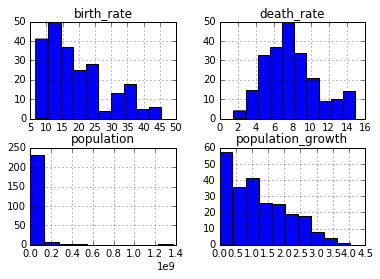

In [11]:
query6 = "SELECT population, population_growth, birth_rate, death_rate from facts WHERE population >0 AND population <7256490011"
results = pd.read_sql_query(query6, conn)
%matplotlib inline
pd.DataFrame.hist(results)